# Class 9: Answers

## Imports

In [8]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, ttest_1samp, ttest_ind, shapiro

warnings.filterwarnings("ignore")

## Part 1. Does wolf inbreeding reduce pup survival?

- Read in the dataset and print it out to see what it looks like.

In [9]:
wolves = pd.read_csv('../Datasets/wolves.csv')
wolves

,inbreedCoef,nPups
0,0.00,6
1,0.00,6
2,0.13,7
3,0.13,5
4,0.13,4
5,0.19,8
6,0.19,7
7,0.19,4
8,0.25,6
9,0.24,3


- Use an appropriate graph to visually examine the association between inbreeding coefficient and number of pups. 

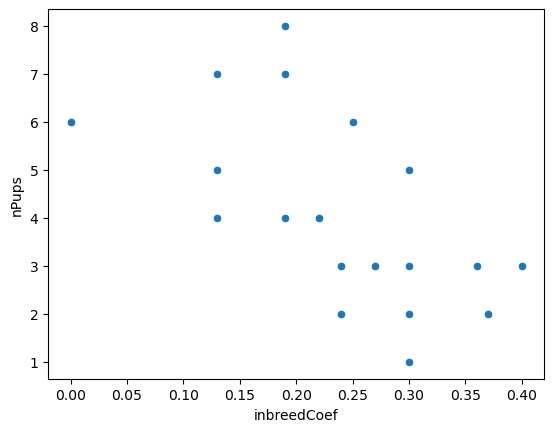

In [10]:
sns.scatterplot(data=wolves, x='inbreedCoef', y='nPups');

- State the biological, null and alternative hypotheses. 

- Biological: There is an association between the inbreeding coefficient of wolf breeding pairs and the number of surviving pup.
- Null: No correlation: ρ=0
- Alternative: Correlated: ρ $\ne$ 0

- Perform a pearson correlation test and output the correlation coefficient and *p*-value.

In [11]:
rtest = pearsonr( wolves['inbreedCoef'], wolves['nPups'] )
rtest

PearsonRResult(statistic=-0.6077184108804111, pvalue=0.0016330410641975397)

- Calculate and print the 95% confidence interval of the population correlation coefficient.

In [12]:
ci = rtest.confidence_interval()
ci.low, ci.high

(-0.812041774370199, -0.2706791232852262)

- Report the outcome of the test as you would in a scientific report, paper or poster. This means reporting

Liberg et al (2005) measured the inbreeding coefficient of 24 pairs of mated wolves and the number of their pups that survived. They found a significant negative correlation between inbreeding coefficient and number of surviving pups (*n*=24, *r*=-0.61, 95%CI=(-0.81, -0.27), *p*=0.002).

## Part 2. Is white blood cell count associated with parasitaemia in malaria infections?

- Read in the dataset and print it out to see what it looks like.

In [13]:
malaria = pd.read_csv('../Datasets/malaria.csv')
malaria

,wbc,parasitaemia
0,6464,50657
1,7012,14301
2,7127,1012752
3,8558,364
4,7141,17004
5,9075,105
6,7760,388786
7,8603,2653
8,8258,103700
9,6961,79152336


- Use an appropriate graph to visually examine the association between white blood cell count and parasitaemia. 

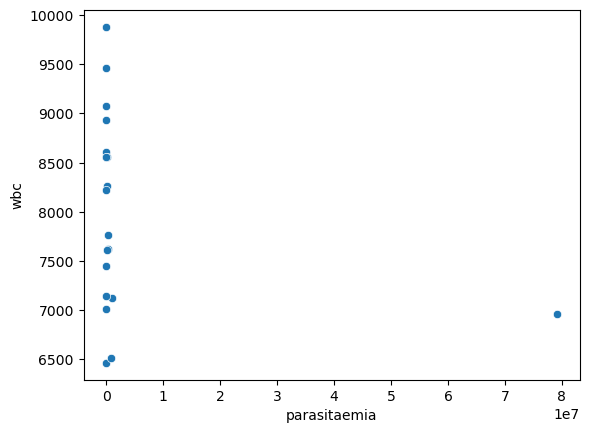

In [14]:
sns.scatterplot(data=malaria, y='wbc', x='parasitaemia');

- Perform a pearson correlation test and output the correlation coefficient and *p*-value.

In [15]:
rtest = pearsonr( malaria['wbc'], malaria['parasitaemia'] )
rtest

PearsonRResult(statistic=-0.2568609786773818, pvalue=0.274295255082184)

- Plot a histogram of white blood cell counts. Do the data look normally distributed?

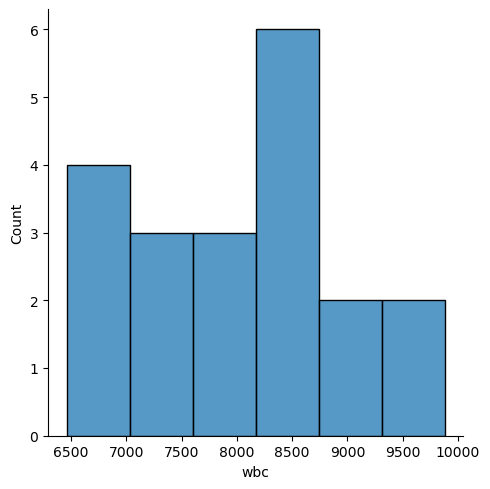

In [16]:
sns.displot(malaria['wbc'])

- Perform a Shapiro-Wilks test on white blood cell counts.

In [17]:
Wtest = shapiro( malaria['wbc'] )
Wtest

ShapiroResult(statistic=0.9668071811747152, pvalue=0.6865470737772223)

- Plot a histogram of parasitaemia. Do the data look normally distributed?

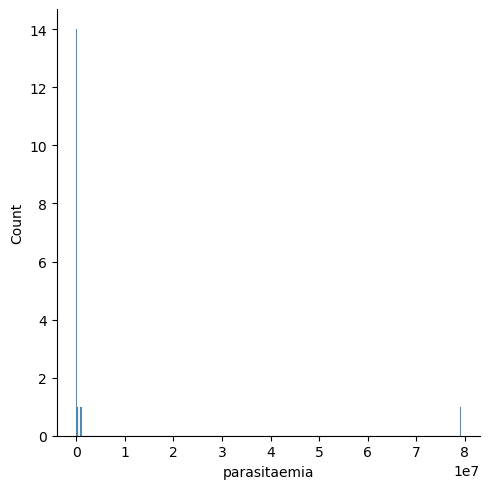

In [18]:
sns.displot(malaria['parasitaemia']);

- Perform a Shapiro-Wilks test on parasitaemia.

In [19]:
Wtest = shapiro( malaria['parasitaemia'] )
Wtest

ShapiroResult(statistic=0.2454381431375069, pvalue=3.1349331221307923e-09)

- Add the log-transform of parasitaemia to your dataframe. 

In [20]:
malaria['logpara'] = np.log(malaria['parasitaemia'])

- Plot a histogram of the log-transformed parasitaemia. Do the now data look normally distributed?

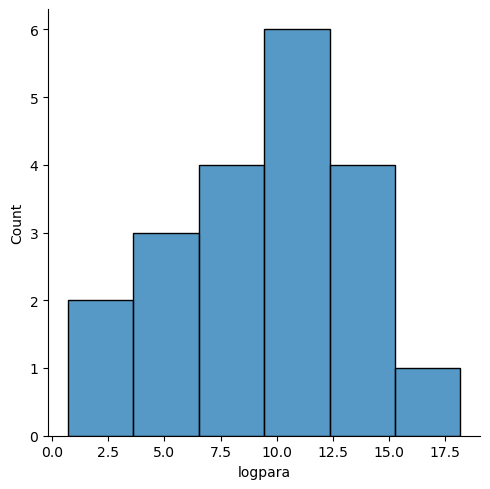

In [21]:
sns.displot(malaria['logpara']);

- Perform a Shapiro-Wilks test on the log-transformed parasitaemia.

In [22]:
Wtest = shapiro(malaria['logpara'])
Wtest

ShapiroResult(statistic=0.9823307523816776, pvalue=0.9605210844365761)

- Use an appropriate graph to visually examine the association between white blood cell count and log-transformed parasitaemia. 

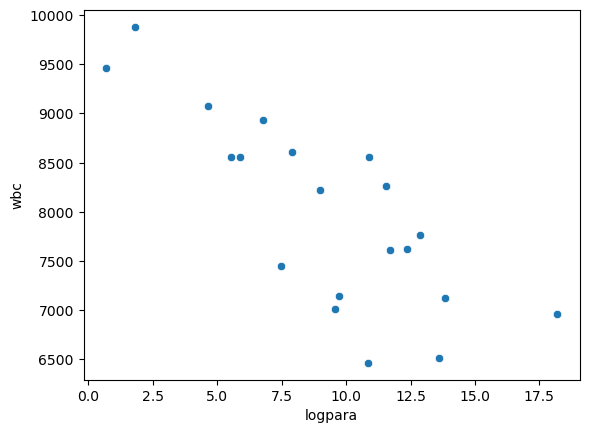

In [23]:
sns.scatterplot(data=malaria, y='wbc', x='logpara');

- Finally perform a pearson correlation test on white blood cell count and log-parasitaemia.

In [24]:
rtest = pearsonr( malaria['wbc'], malaria['logpara'] )
rtest

PearsonRResult(statistic=-0.7888139190583501, pvalue=3.5808682135910535e-05)

- Calculate the 95%CI.

In [25]:
ci = rtest.confidence_interval()
ci.low, ci.high

(-0.9127308797246103, -0.531994688860376)


- Report the outcome of the test as you would in a scientific report, paper or poster. This means reporting

A significant, strong negative correlation was found between white blood cell counts and log-parasitaemia in malaria infected children (*n* = 20, *r* = -0.79, 95%CI = (-0.91, -0.53), *p* < 0.001)

## Part 3. Do two-spot ladybird sizes vary between sites with different levels of predation?

- Read in the dataset and print it out to see what it looks like.

In [26]:
ladybirds = pd.read_csv('../Datasets/ladybird_sizes.csv')
ladybirds

,predation,size
0,high,5.00
1,high,5.50
2,high,5.00
3,high,5.25
4,high,4.75
5,high,5.50
6,high,5.25
7,high,5.00
8,high,4.75
9,high,4.50


- Use an appropriate graph to visually examine ladybird sizes in the two cemeteries. 

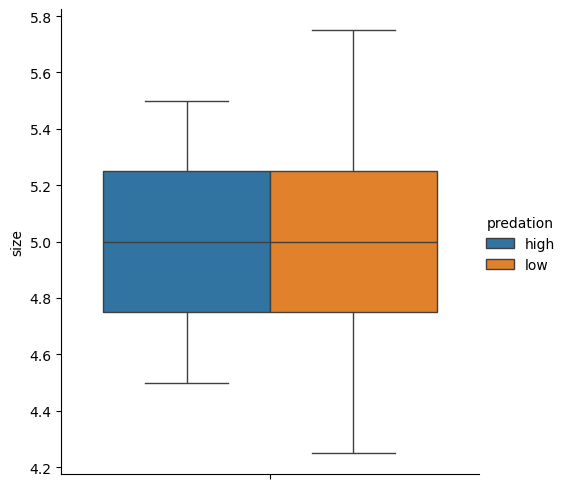

In [27]:
sns.catplot(data=ladybirds, y='size', hue='predation', kind='box');

- Create "low" and "high" predation groups. Print them out to make sure you have done this correctly.

In [28]:
high_group = ladybirds[ladybirds['predation'] == 'high']
low_group = ladybirds.query('predation == "low"')

low_group

,predation,size
21,low,5.00
22,low,4.75
23,low,4.50
24,low,5.25
25,low,4.50
26,low,5.00
27,low,5.75
28,low,5.25
29,low,5.25
30,low,4.25


- Using the two groups you've just created, calculate the mean ladybird size of each group (use `.mean()`)
- And calculate the difference in the mean sizes between the groups.

In [29]:
high_group['size'].mean() - low_group['size'].mean()

0.07068452380952372

- State the biological, null and alternative hypotheses. 

- Biological: There is an association between mean ladybird size and their level of predation.
- Null: There is no difference in mean sizes of ladybirds between the two predation sites.
- Alternative: There is a difference in mean sizes of ladybirds between the two predation sites.

- Perform a two-sample *t*-test and output the *t*-statistic and the *p*-value.

In [30]:
result = ttest_ind( high_group['size'], low_group['size'] )
result

TtestResult(statistic=0.7906859156972449, pvalue=0.4327888688905015, df=51.0)

- Calculate and print the 95% confidence interval of the difference in population means.

In [31]:
ci = result.confidence_interval()
ci.low, ci.high

(-0.10878636342307349, 0.2501554110421209)

- Report the outcome of the test as you would in a scientific report, paper or poster. This means reporting

There was no statistically significant difference in mean two-spot ladybird sizes between the low and high Harlequin predation cemeteries (*n* = 53, *t* = 0.79, 95%CI = (-0.11, 0.25), *p* = 0.43).